In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(columns=["Cabin","Ticket"],inplace=True)

In [4]:
def title(x):
    titlex = x.split(",")[1].split(".")[0].lstrip()
    return titlex
df["Title"] = df.Name.apply(title)

In [6]:
df.drop(columns="Name",inplace=True)

In [7]:
df.drop(columns="PassengerId",inplace=True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

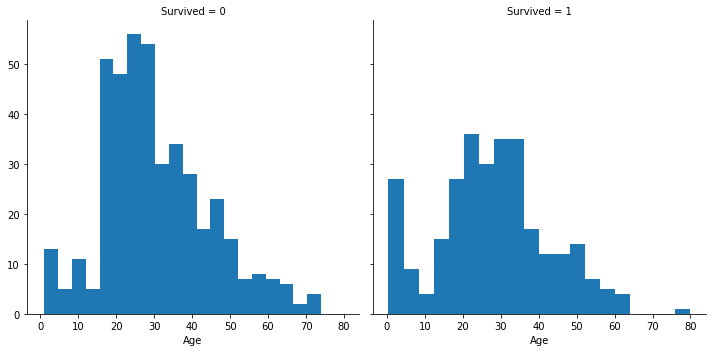

In [20]:
g = sns.FacetGrid(df,col="Survived",size=5)
g.map(plt.hist,"Age",bins=20);

C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


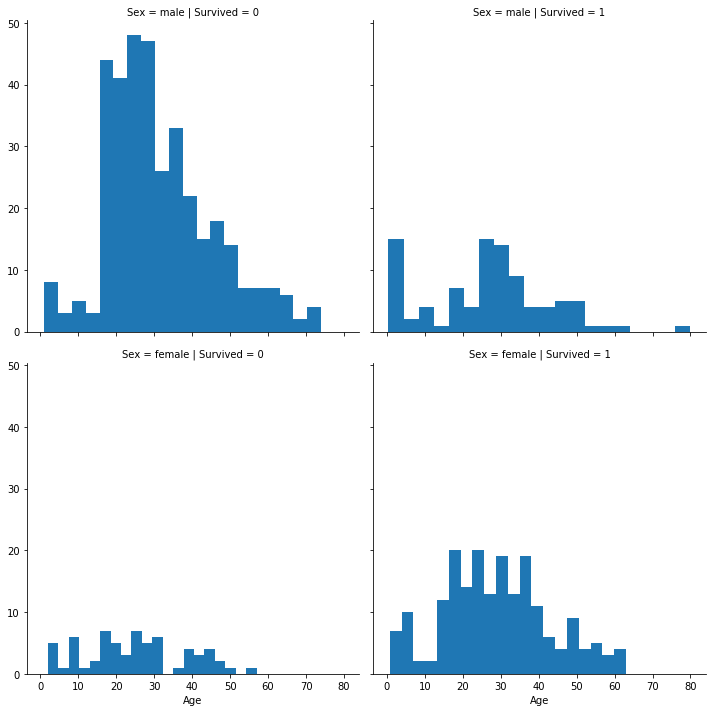

In [23]:
g = sns.FacetGrid(df,col="Survived",row="Sex",size=5)
g.map(plt.hist,"Age",bins=20)

C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for mult

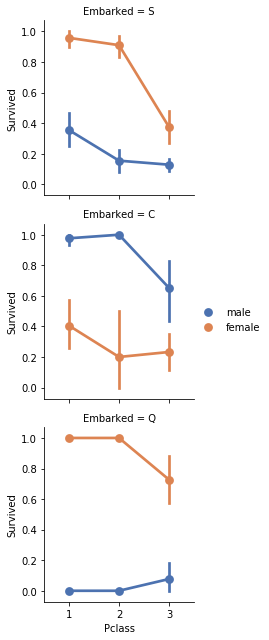

In [29]:
g = sns.FacetGrid(df,row="Embarked");
g.map(sns.pointplot,"Pclass","Survived","Sex",palette="deep");
g.add_legend();

C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lenovo\Anaconda2\envs\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
 

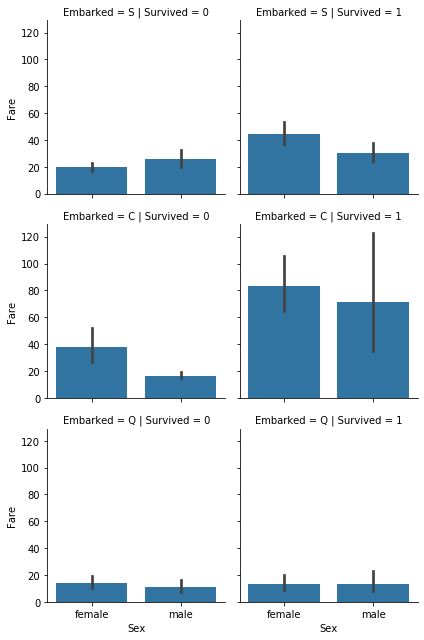

In [31]:
g = sns.FacetGrid(df,col="Survived",row="Embarked")
g.map(sns.barplot,"Sex","Fare");

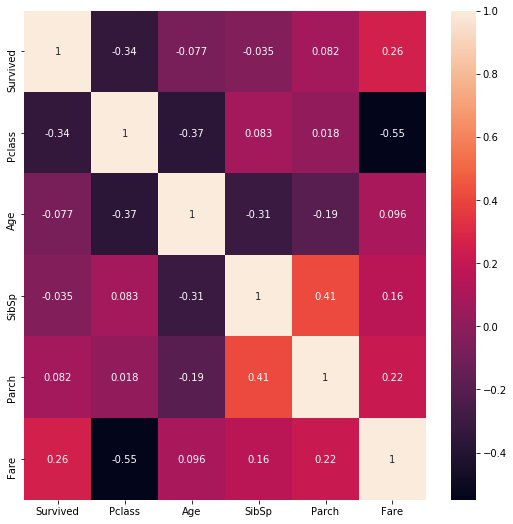

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

In [41]:
df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Ms                1
Mme               1
Jonkheer          1
the Countess      1
Sir               1
Capt              1
Don               1
Name: Title, dtype: int64

In [43]:
titlefix = ["Mr","Miss","Mrs","Master"]
def grouptitle(x):
    if x in titlefix:
        return x
    else:
        return "Others"
df["Title"] = df.Title.apply(grouptitle)

In [44]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Others
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


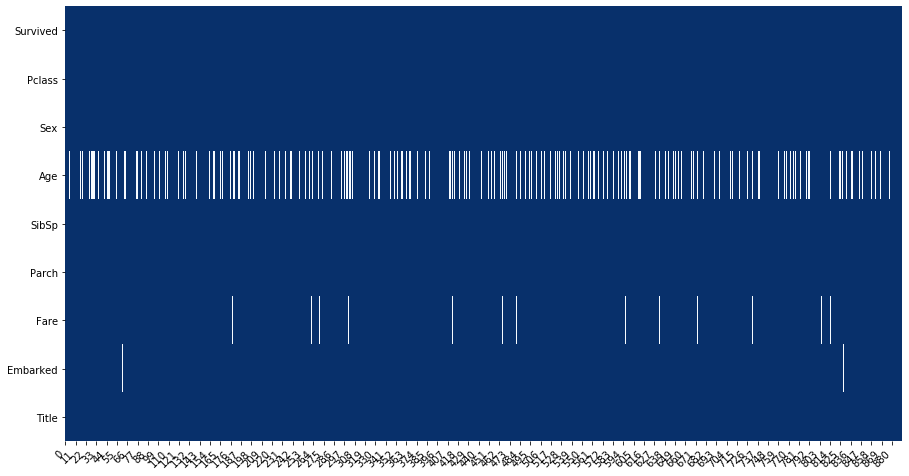

In [56]:
plot_missing_value(df)

In [46]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df[["Pclass","Fare"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Fare",ascending=True)

,Pclass,Fare
2,3,13.675550
1,2,20.662183
0,1,84.154687


In [55]:
df["Age"] = pd.cut(df.Age,[0,12,21,30,50,100],labels=["A","B","C","D","E"])
df["Fare"] = pd.cut(df.Fare,[0,40,100,600],labels=["murah","sedang","mahal"])

In [65]:
df["isAlone"] = (df.SibSp == 0)& (df.Parch == 0)
df["isAlone"] = df.isAlone.astype(int)

In [67]:
df.drop(columns=["SibSp","Parch"],inplace=True)

In [70]:
X = df.drop(columns="Survived")
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=53)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
categoricalOrdinal = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("ordinal",OrdinalEncoder())
])
categoricalOneHot = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("ordinal",OneHotEncoder(handle_unknown="ignore"))
])

In [73]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,male,C,murah,S,Mr,0
1,1,1,female,D,sedang,C,Mrs,0
2,1,3,female,C,murah,S,Miss,1
3,1,1,female,D,sedang,S,Mrs,0
4,0,3,male,D,murah,S,Mr,1


In [78]:
preprocessor  = ColumnTransformer([
    ("onehot",categoricalOneHot,["Title","isAlone"]),
   ("ordinal",categoricalOrdinal,["Pclass","Age","Fare","Sex","Embarked"])
])

In [75]:
from jcopml.tuning import grid_search_params as gsp

In [79]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=53))
])

In [80]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.rf_params, cv=4, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   28.9s finished


{'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 100}
0.8202247191011236 0.8089887640449439 0.8603351955307262


In [90]:
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

In [92]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.xgb_params, cv=4,  n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 4 folds for each of 6561 candidates, totalling 26244 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

{'algo__colsample_bytree': 0.8, 'algo__gamma': 1, 'algo__learning_rate': 0.01, 'algo__max_depth': 3, 'algo__n_estimators': 200, 'algo__reg_alpha': 0.01, 'algo__reg_lambda': 0.01, 'algo__subsample': 0.8}
0.8174157303370787 0.8160112359550562 0.8715083798882681


In [93]:
save_model(model.best_estimator_, "titanicxgboost.pkl")

Model is pickled as model/titanicxgboost.pkl


In [97]:
df = pd.read_csv("test.csv")
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
df.drop(columns=["Cabin","Ticket","PassengerId"],inplace=True)

In [101]:
def title(x):
    titlex = x.split(",")[1].split(".")[0].lstrip()
    return titlex
df["Title"] = df.Name.apply(title)

In [102]:
titlefix = ["Mr","Miss","Mrs","Master"]
def grouptitle(x):
    if x in titlefix:
        return x
    else:
        return "Others"
df["Title"] = df.Title.apply(grouptitle)

In [103]:
df["Age"] = pd.cut(df.Age,[0,12,21,30,50,100],labels=["A","B","C","D","E"])
df["Fare"] = pd.cut(df.Fare,[0,40,100,600],labels=["murah","sedang","mahal"])

In [104]:
df["isAlone"] = (df.SibSp == 0)& (df.Parch == 0)
df["isAlone"] = df.isAlone.astype(int)

In [105]:
df.drop(columns=["SibSp","Parch"],inplace=True)

In [107]:
df.drop(columns="Name",inplace=True)

In [109]:
modelLoad = load_model("model/titanicxgboost.pkl")

In [110]:
gender = pd.read_csv("gender_submission.csv")

In [111]:
y = modelLoad.predict(df)

In [113]:
from  sklearn.metrics import confusion_matrix

In [114]:
confusion_matrix(gender.Survived,y)

array([[259,   7],
       [ 39, 113]], dtype=int64)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(gender.Survived,y)

0.8899521531100478

In [116]:
gender.drop(columns="Survived",inplace=True)

In [117]:
gender["Survived"] = y

In [119]:
gender.to_csv("submitxgboost.csv",index=False)